In [1]:
import numpy as np
import scipy.sparse

from sklearn.decomposition import LatentDirichletAllocation as LDA

import matplotlib.pyplot as plt
import seaborn as sns


In [152]:
NUM_RECIPES = 50000
NUM_INGREDIENTS = 200

In [153]:
data = np.load('dataset.npz', allow_pickle=True)

In [154]:
raw_ingredients = data["ingredients"][:NUM_INGREDIENTS]

In [155]:
all_recipes = data["recipes"]

In [156]:
raw_recipes = all_recipes[:NUM_RECIPES]

In [157]:
ingredient_counts = np.zeros(3500)
for recipe_index, recipe in enumerate(raw_recipes):
    for ingredient_index in recipe:
        ingredient_counts[ingredient_index] += 1

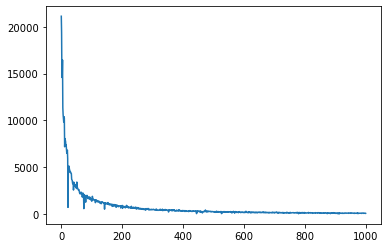

In [158]:
# Frequency of ingredients as a function of their index
plt.figure()
plt.plot(ingredient_counts[:1000])
plt.show()

In [159]:
recipes = scipy.sparse.dok_matrix((NUM_RECIPES, NUM_INGREDIENTS), dtype=np.int)

for recipe_index, recipe in enumerate(raw_recipes):
    for ingredient_index in recipe:
        if ingredient_index < NUM_INGREDIENTS:
            recipes[recipe_index, ingredient_index] = 1

In [160]:
recipes = scipy.sparse.csr_matrix(recipes)

In [161]:
lda = LDA(n_components = 20)

In [162]:
lda.fit(recipes)

LatentDirichletAllocation(n_components=20)

In [180]:
random_recipe = np.zeros((1, NUM_INGREDIENTS))
random_recipe[:, 123] = 1
random_recipe[:, 115] = 1
random_recipe[:, 19] = 1
random_recipe[:, 102] = 1
random_recipe[:, 14] = 1
random_recipe[:, 134] = 1
random_recipe[:, 141] = 1
random_recipe[:, 131] = 1
random_recipe[:, 31] = 1
random_recipe[:, 124] = 1

In [169]:
def print_topics(model, ingredients, n_top_words):
    words = ingredients
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" | ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [221]:
def print_recipe(ingredients, recipe):
    indices = recipe.indices
    for i in indices:
        print(ingredients[i])

In [223]:
print_recipe(raw_ingredients, recipes[10])

cheese
cream
garlic
garlic powder
lemon
lemon juice
onion
pepper
salt
sauce
sour cream
worcestershire sauce


In [171]:
scores = []
lengths = []
for ind in range(int(recipes.shape[0]/10)):
    lengths.append(recipes[ind].getnnz())
    scores.append(lda.score(recipes[ind]))

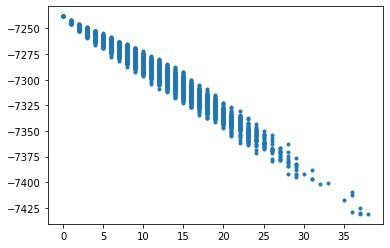

In [172]:
plt.figure()
plt.scatter(lengths, scores, marker=".")
plt.show()

In [200]:
def generate_recommendation(lda, recipe):
    best_score, best_index = float("-inf"), None
    for i in range(NUM_INGREDIENTS):
        modified_recipe = recipe[:, :]
        if modified_recipe[:, i]:
            continue
        else:
            modified_recipe[:, i] = 1
            new_score = lda.score(modified_recipe)
            if new_score > best_score:
                best_score = new_score
                best_index = i
                print("New best score: ", best_score)

    returned_recipe = recipe[:, :]
    returned_recipe[:, best_index] = 1
    return returned_recipe, best_index

In [234]:
i = 10324
new_recipe, ind = generate_recommendation(lda, recipes[i])
print()
print_recipe(raw_ingredients, recipes[i])
print()
print("New ingredient:")
print(raw_ingredients[ind])

New best score:  -7325.3773265551
New best score:  -7323.857625511993
New best score:  -7323.612493799758

basil
butter
chicken
chives
cilantro
green
leaves
lettuce
noodles
peanut butter
pork
sauce
shrimp
sugar
unsweetened

New ingredient:
garlic


<1x200 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [174]:
print_topics(lda, raw_ingredients, 10)


Topic #0:
lemon | lemon juice | cayenne | pepper | garlic | cayenne pepper | salt | paprika | black pepper | garlic powder

Topic #1:
flour | salt | sugar | soda | butter | eggs | powder | baking soda | baking powder | water

Topic #2:
sauce | onion | worcestershire sauce | pepper | ground | salt | ground beef | water | garlic | sugar

Topic #3:
olive | olive oil | garlic | salt | lemon | virgin olive oil | extra virgin olive oil | pepper | lemon juice | garlic cloves

Topic #4:
extract | vanilla extract | sugar | butter | flour | powder | salt | eggs | baking powder | milk

Topic #5:
garlic | pepper | ground pepper | carrots | salt | onion | celery | garlic cloves | thyme | olive

Topic #6:
cream | cheddar | cheddar cheese | sour cream | pepper | onion | cheese | milk | salt | butter

Topic #7:
vegetable | vegetable oil | flour | salt | water | eggs | white | sugar | milk | cooking spray

Topic #8:
parmesan | parmesan cheese | grated parmesan cheese | garlic | pepper | pasta | salt |